In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sales_data/Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# prompt: how to read all files in a directory in python in google colab?

import os

# Define the directory path in your Google Drive
directory_path = '/content/drive/MyDrive/Sales_data/Sales_Data' # Replace with your folder name

# Check if the directory exists
if os.path.exists(directory_path):
  # Get a list of all files in the directory
  files_in_directory = os.listdir(directory_path)

  # Print the names of all files
  print("Files in the directory:")
  for file_name in files_in_directory:
    print(file_name)
else:
  print(f"Directory not found: {directory_path}")
  print("Please make sure you have mounted your Google Drive and the path is correct.")

Files in the directory:
Sales_March_2019.csv
Sales_January_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_November_2019.csv
Sales_June_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_April_2019.csv
Sales_October_2019.csv


In [ ]:
import os

In [ ]:
files=[file for file in os.listdir('/content/drive/MyDrive/Sales_data/Sales_Data')]

for file in files:
  print(file)

Sales_March_2019.csv
Sales_January_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_February_2019.csv
Sales_December_2019.csv
Sales_November_2019.csv
Sales_June_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_April_2019.csv
Sales_October_2019.csv


In [ ]:
files=[file for file in os.listdir('/content/drive/MyDrive/Sales_data/Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
  df=pd.read_csv('/content/drive/MyDrive/Sales_data/Sales_Data/'+file)
  all_months_data=pd.concat([all_months_data,df])

all_months_data.head()
all_months_data.to_csv("all_data.csv",index=False)


In [ ]:
all_data=pd.read_csv('/content/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
#question-1 what was the best month for sales? How much was earned that month?

In [ ]:
#first clean the data

In [ ]:
nan_df=all_data[all_data.isna().any(axis=1)]
all_data=all_data.dropna(how="all")
all_data.head( )

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [ ]:
all_data=all_data[all_data["Order Date"].str[0:2] !="Or"]

In [ ]:
#adding a month column
all_data["Month"]=all_data["Order Date"].str[0:2]
all_data["Month"]=all_data["Month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


In [ ]:
all_data = all_data.astype({'Quantity Ordered': int, 'Price Each': float})

In [ ]:
#Adding a sales column
all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


Question 1 : What was the best month for sales? How much was earned that month?

In [ ]:
all_data.groupby("Month").sum()["Sales"]

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


Visually seeing the sales

<BarContainer object of 12 artists>

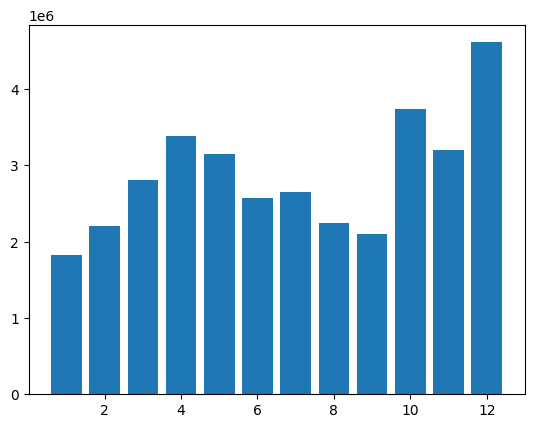

In [ ]:
import matplotlib.pyplot as plt
montsh = range(1,13)
plt.bar(montsh,all_data.groupby("Month").sum()["Sales"])


#Question 2: What city had the hightst number of sales?

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


In [ ]:
#first extracting the cities from the purchase address

In [ ]:
all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco


In [ ]:
all_data.groupby("City").sum()["Sales"]

,Sales
City,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80
New York City,4664317.43
Portland,2320490.61
San Francisco,8262203.91
Seattle,2747755.48


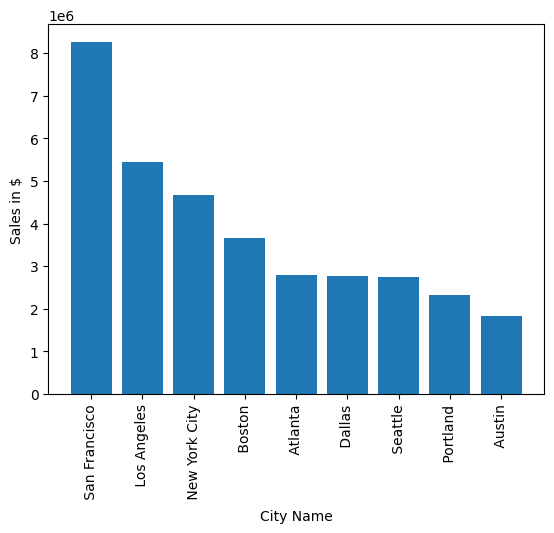

In [ ]:
import matplotlib.pyplot as plt

city_sales=all_data.groupby("City").sum()["Sales"].sort_values(ascending=False)
sorted_cities=city_sales.index
sorted_sales=city_sales.values

plt.bar(sorted_cities,city_sales)

plt.xticks(sorted_cities, rotation='vertical', size=10)


plt.xlabel("City Name")
plt.ylabel("Sales in $")
plt.show()

Question 3: What time should we display advertisements to maximize the likelihood of customer's buying product?

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco


In [ ]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Minute"]=all_data["Order Date"].dt.minute

all_data.head()

<ipython-input-21-2134823148>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0,1


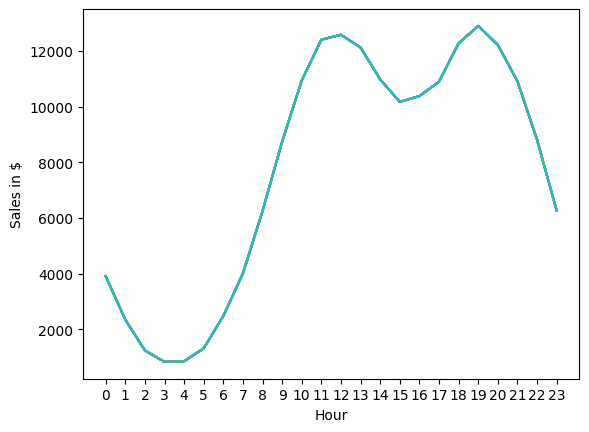

In [ ]:
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby("Hour")]


plt.plot(hours,all_data.groupby("Hour").count())
plt.xticks(hours)



plt.xlabel("Hour")
plt.ylabel("Sales in $")
plt.show()

Question 4: What products are most often sold together?

In [ ]:
new_df=all_data[all_data["Order ID"].duplicated(keep=False)]
new_df['Grouped']=new_df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))
new_df.head()

<ipython-input-23-1297456650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Grouped']=new_df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2,11,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles,2,11,"iPhone,Lightning Charging Cable"


In [ ]:
new_df=new_df[["Order ID", 'Grouped']].drop_duplicates()
new_df.head()

,Order ID,Grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [ ]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in new_df["Grouped"]:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [ ]:
# prompt: can you give me ideas what else analysis I can do with my sales data?

Based on the code you've provided, which already analyzes sales by month, city, time of day, and frequently co-purchased products, here are some other analysis ideas you could perform on your sales data:

*   **Product Performance Analysis:**
    *   Which products have the highest total sales revenue?
    *   Which products have the highest quantity sold?
    *   Calculate the average price for each product.
    *   Analyze sales trends for individual products over time (e.g., monthly or seasonal trends).
    *   Identify your top-selling products and your least-selling products.

*   **Customer Analysis (if you had customer IDs):**
    *   Calculate the average purchase value per customer.
    *   Identify your most valuable customers (e.g., those with the highest total spending).
    *   Perform RFM (Recency, Frequency, Monetary) analysis to segment your customers.
    *   Analyze the products frequently purchased by your top customers.

*   **Geographic Analysis (beyond just city):**
    *   If your purchase addresses include states or zip codes, analyze sales by these regions.
    *   Visualize sales on a map if you have geographic coordinates.

*   **Time Series Analysis:**
    *   Analyze daily, weekly, or yearly sales trends.
    *   Look for seasonality or other patterns in sales over time.
    *   Forecast future sales based on historical data.

*   **Order Analysis:**
    *   Calculate the average number of items per order.
    *   Analyze the distribution of order sizes (in terms of quantity and value).
    *   Analyze the time between orders for the same customer (if you had customer IDs).

*   **Relationship between Sales Metrics:**
    *   Is there a correlation between the price of a product and the quantity sold?
    *   Is there a correlation between the time of day and the types of products purchased?

*   **Discount/Promotion Analysis (if you had this data):**
    *   Analyze the impact of discounts or promotions on sales volume and revenue.

To implement these analyses, you would continue using pandas for data manipulation and matplotlib/seaborn for visualization, similar to your existing code. You might need to add new columns to your `all_data` DataFrame based on your analysis goals.

In [ ]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0,1


Question 5: Which product has the highest sale revenue?

Products with the highest total sales revenue:
Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Sales, dtype: float64


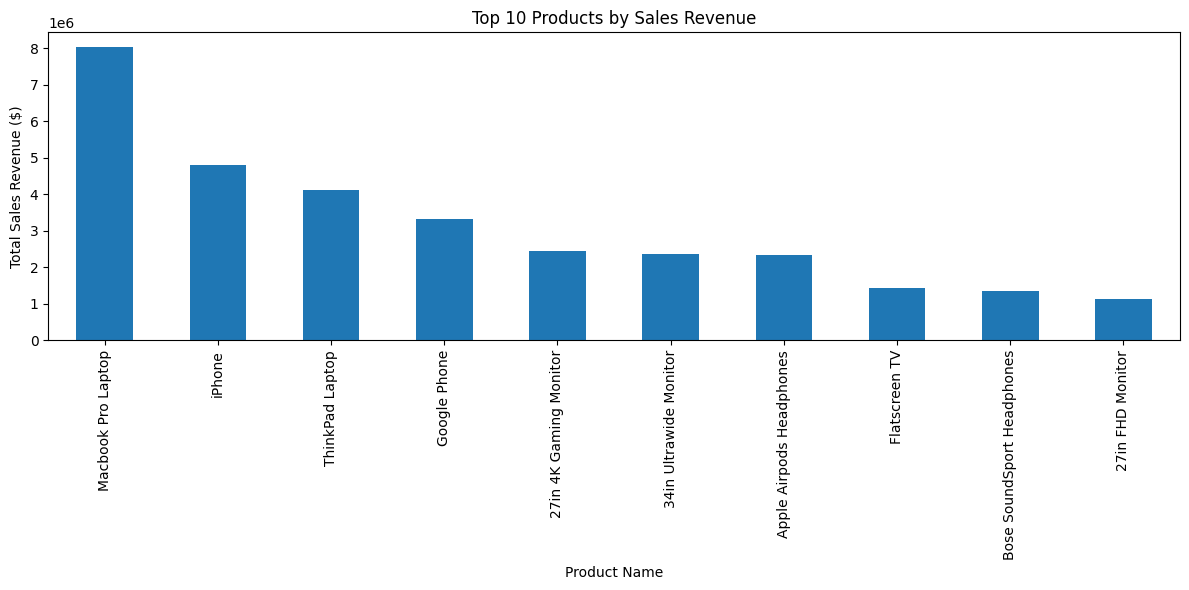

In [ ]:

product_sales = all_data.groupby('Product')["Sales"].sum()
sorted_product_sales = product_sales.sort_values(ascending=False)

print("Products with the highest total sales revenue:")
print(sorted_product_sales)


top_n = 10  # You can change this number to display more or fewer products
plt.figure(figsize=(12, 6))
sorted_product_sales[:top_n].plot(kind='bar')
plt.xlabel("Product Name")
plt.ylabel("Total Sales Revenue ($)")
plt.title(f"Top {top_n} Products by Sales Revenue")
plt.xticks(rotation='vertical', size=10)
plt.tight_layout()
plt.show()

Question 6: Average price for each product?


Average price for each product:
Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


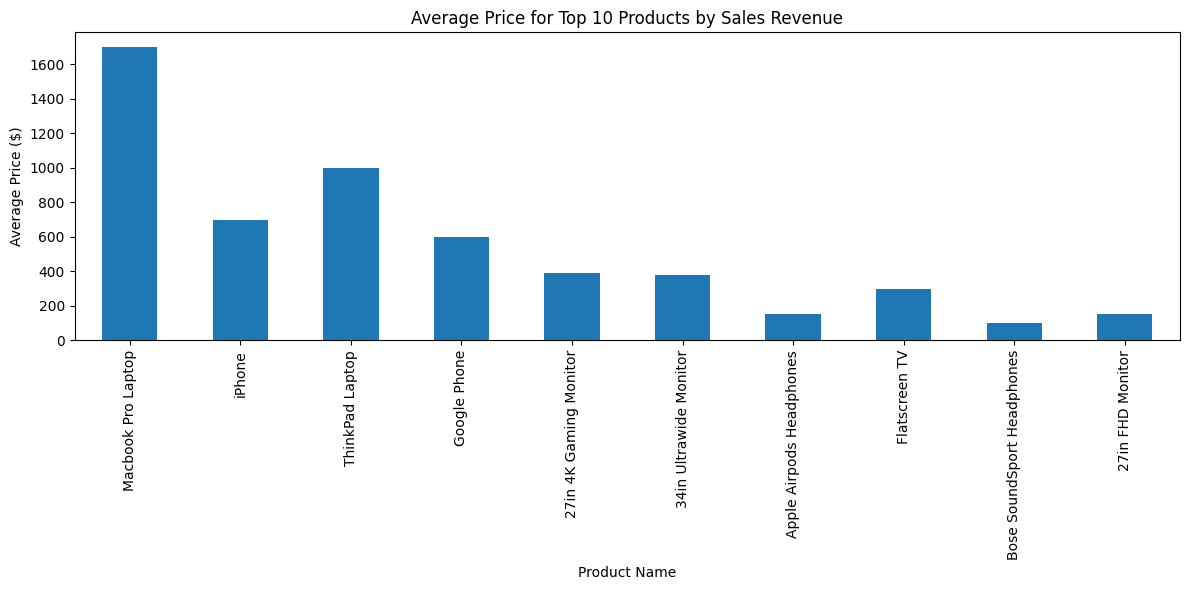

In [ ]:
import matplotlib.pyplot as plt
# Calculate the average price for each product
average_price_per_product = all_data.groupby('Product')['Price Each'].mean()

print("\nAverage price for each product:")
print(average_price_per_product)

# Optional: Visualize the average price of the top N products by sales revenue
plt.figure(figsize=(12, 6))
# Use the index from the previously calculated sorted_product_sales to get the order
top_products = sorted_product_sales.index[:top_n]
average_price_per_product[top_products].plot(kind='bar')
plt.xlabel("Product Name")
plt.ylabel("Average Price ($)")
plt.title(f"Average Price for Top {top_n} Products by Sales Revenue")
plt.xticks(rotation='vertical', size=10)
plt.tight_layout()
plt.show()